In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

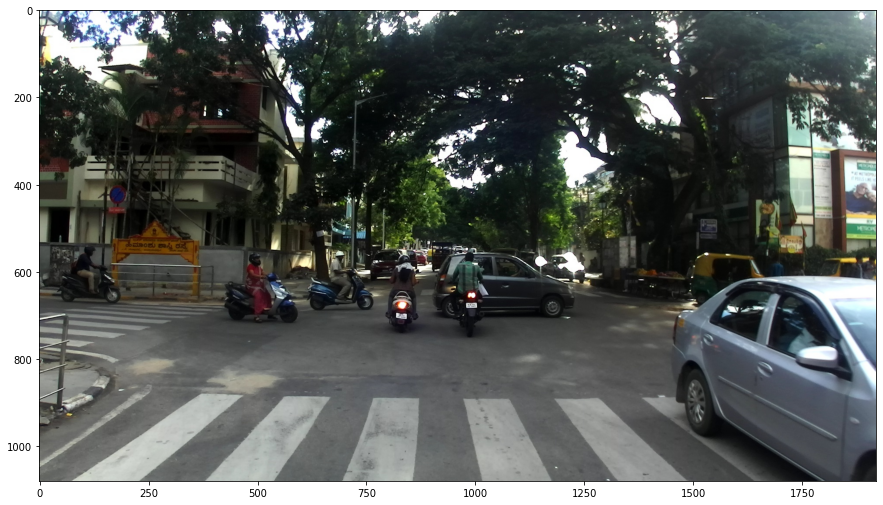

In [2]:
input_dir = 'dashcam_frames_input'

### Display input image
first_image = os.listdir(input_dir)[0]
input_image = cv2.imread(input_dir+'/'+first_image)[:,:,::-1]
plt.figure(figsize=(15,15))
plt.imshow(input_image)
plt.show()

In [3]:
######## FGVD model Inference on input image

source_dir = 'FGVD_output/crops'
### cleaning old outputs
os.system('rm -r '+source_dir+'/*')
os.system('rm '+source_dir.split('/')[0]+'/*.txt')

### yolov5l model (after fine-tuning on IDD_FGVD train dataset) weights path 
yolov5l_wegihts = 'yolov5l_best.pt'

### Yolov5l for localization of all vehicles in scene image
os.system('cd yolov5; python detect.py --weights '+yolov5l_wegihts+' --img 640 --conf 0.25 --iou-thres 0.5 --source ../'+input_dir+' --save-txt')

### preparing yolov5l output cropped vehicle images to give as input to HRN model
imgslst = os.listdir(source_dir)
dummy_labels = ['bus_bus_bus']*len(imgslst)
hrn_inputlist = pd.DataFrame({'imgs':imgslst, 'labels':dummy_labels})
hrn_inputlist.to_csv(source_dir+'_hrninputlist.txt', index=False, header=False, sep='\t')

### HRN for fine-grained classification of detected vehicle images
os.system('cd HRN; python3 hrn-fgvd.py --imgsdir ../'+source_dir+' --imgslist ../'+source_dir+'_hrninputlist.txt')


detect: weights=['yolov5l_best.pt'], source=../dashcam_frames_input, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2023-1-18 Python-3.10.6 torch-1.12.0+cu102 CPU

Fusing layers... 
Model summary: 367 layers, 46140588 parameters, 0 gradients, 107.7 GFLOPs
image 1/1 /home/chirag/cp_wks/public-FGVD/dashcam_frames_input/demo.png: 384x640 1 autorickshaw, 2 buss, 4 cars, 1 mini-bus, Done. (0.702s)
Speed: 1.0ms pre-process, 702.0ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels
/home/chirag/yoloenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: T

###### HRN Output saved to ---> ../FGVD_output/crops_hrninputlist_hrnoutput.txt


0

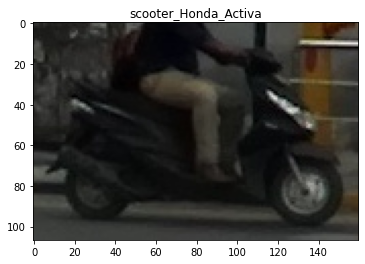

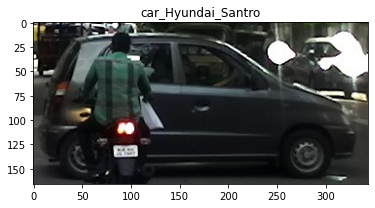

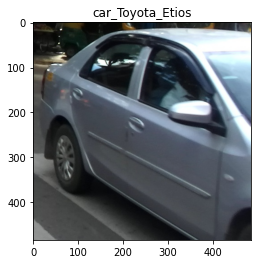

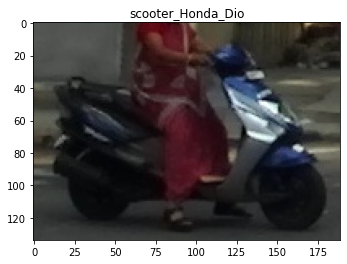

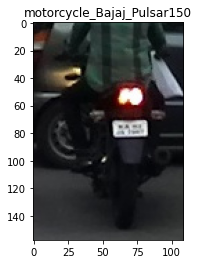

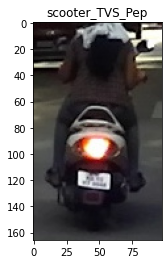

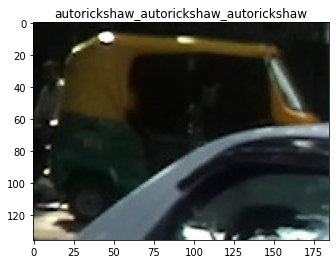

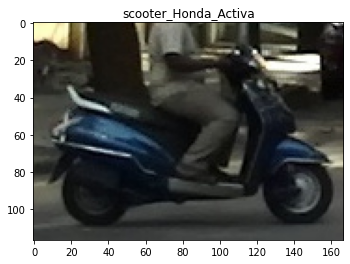

In [4]:
############ Display FGVD model outputs on input images

fgvd_output = pd.read_csv(source_dir+'_hrninputlist_hrnoutput.txt', header=None, sep='\t')

for fi in range(fgvd_output.shape[0]):
    ### Display output
    plt.figure()
    img = cv2.imread(source_dir+'/'+fgvd_output.loc[fi,0])[:,:,::-1]
    plt.imshow(img)
    plt.title(fgvd_output.loc[fi,1])

plt.show()